In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df = df[["GarageQual","FireplaceQu","SalePrice"]]

In [7]:
df

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,TA,Gd,266500
1458,TA,NaN,142125


In [9]:
df.isnull().mean()*100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

<AxesSubplot:>

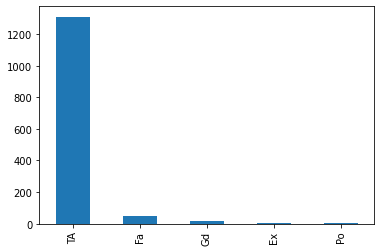

In [11]:
df["GarageQual"].value_counts().plot(kind = "bar")

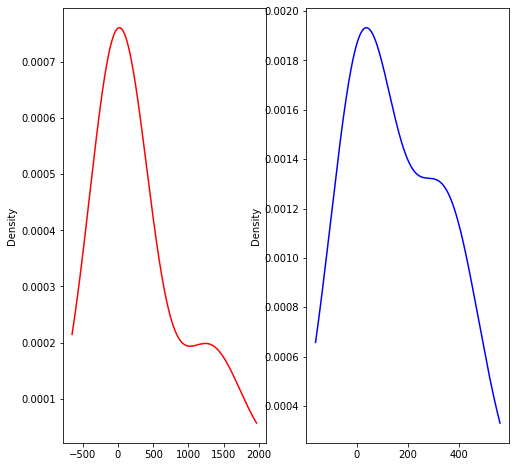

In [14]:
plt.figure(figsize=(8,8))

plt.subplot(121)
df["GarageQual"].value_counts().plot(kind = "kde", color = "red")
plt.subplot(122)
df["FireplaceQu"].value_counts().plot(kind = "kde", color = "blue")
plt.show()

In [18]:
df["GarageQual"].mode()

0    TA
dtype: object

In [19]:
df["FireplaceQu"].mode()

0    Gd
dtype: object

In [21]:
df["GarageQual_mode"] = df["GarageQual"].fillna("TA")
df["FireplaceQu_mode"] = df["FireplaceQu"].fillna("Gd")

In [22]:
df

,GarageQual,FireplaceQu,SalePrice,GarageQual_mode,FireplaceQu_mode
0,TA,NaN,208500,TA,Gd
1,TA,TA,181500,TA,TA
2,TA,TA,223500,TA,TA
3,TA,Gd,140000,TA,Gd
4,TA,TA,250000,TA,TA
...,...,...,...,...,...
1455,TA,TA,175000,TA,TA
1456,TA,TA,210000,TA,TA
1457,TA,Gd,266500,TA,Gd
1458,TA,NaN,142125,TA,Gd


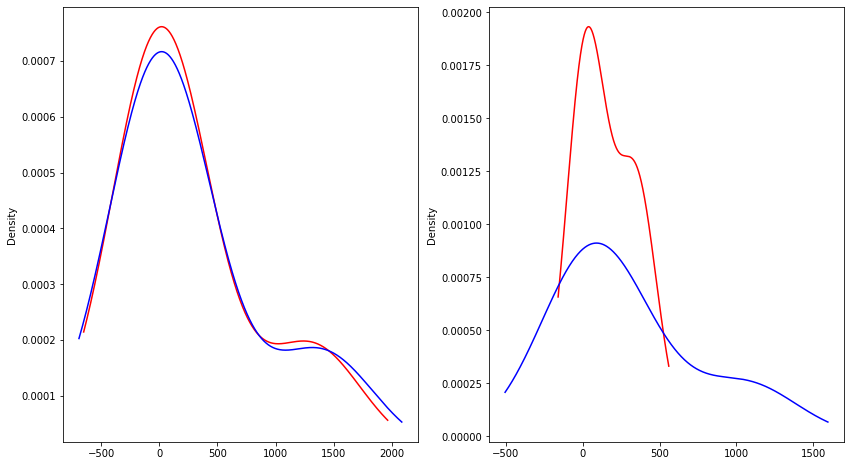

In [23]:
plt.figure(figsize=(14,8))

plt.subplot(121)
df["GarageQual"].value_counts().plot(kind = "kde", color = "red")
df["GarageQual_mode"].value_counts().plot(kind = "kde", color = "blue")
plt.subplot(122)
df["FireplaceQu"].value_counts().plot(kind = "kde", color = "red")
df["FireplaceQu_mode"].value_counts().plot(kind = "kde", color = "blue")
plt.show()

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer